In [1]:
%cd ..

/Users/danorel/Workspace/Education/Self-Education/Programming/AI/MuJoCo/rlab


In [2]:
import mujoco
import mujoco.viewer
import mediapy as media

In [3]:
m = mujoco.MjModel.from_xml_path("tutorial/models/box_and_square.xml")
d = mujoco.MjData(m)

In [4]:
d.geom_xpos

array([[0., 0., 0.],
       [0., 0., 0.]])

In [5]:
mujoco.mj_kinematics(m, d)
d.geom_xpos

array([[0. , 0. , 0. ],
       [0.2, 0.2, 0.2]])

In [ ]:
renderer = mujoco.Renderer(m)

""

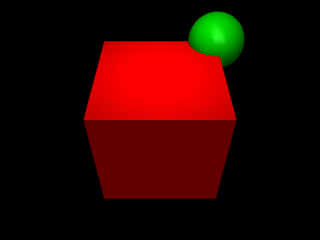

In [6]:
mujoco.mj_resetData(m, d)
mujoco.mj_forward(m, d)
renderer.update_scene(d)
media.show_image(renderer.render())

In [7]:
duration = 5
fps = 60

frames = []
mujoco.mj_resetData(m, d)
while d.time < duration:
    mujoco.mj_step(m, d)
    if len(frames) < d.time * fps:
        renderer.update_scene(d)
        pixels = renderer.render()
        frames.append(pixels)
media.show_video(frames, fps=fps)